# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Dewi Rachmawati]
- **Email:** [rchmw.dewi10@gmail.com]
- **ID Dicoding:** [iam_dewir]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?
- Pertanyaan 2: Bagaimana perbedaan penyewaan sepeda pada weekend dibandingkan weekday?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas.api.types import CategoricalDtype

## Data Wrangling

### Gathering Data

1. Memuat Tabel Day menjadi sebuah DataFrame

In [160]:
day_df = pd.read_csv("https://raw.githubusercontent.com/dysthymicfact/AnalisisDataPython/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. Memuat Tabel Hour menjadi sebuah DataFrame

In [161]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/dysthymicfact/AnalisisDataPython/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

1. Memeriksa tipe data dari tiap kolom yang terdapat dalam day_df

In [162]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Berdasarkan tipe data dari seluruh kolom menunjukkan bahwa terdapat tipe data yang tidak sesuai yakni pada kolom dteday dengan tipe data object semestinya datetime

Untuk memastikan tidak terdapat missing values maka dapat dilakukan pengecekan sebagai berikut

In [163]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Terbukti tidak terdapat missing values pada seluruh kolom

Untuk memastikan tidak terdapat duplikasi data maka dapat dilakukan pengecekan sebagai berikut

In [164]:
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


**Insights:**
Tidak terdapat data duplikat 

2. Memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df

In [165]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insights:**
- Berdasarkan tipe data dari seluruh kolom menunjukkan bahwa terdapat tipe data yang tidak sesuai yakni pada kolom dteday dengan tipe data ojbect, semestinya datetime

Untuk memastikan tidak terdapat missing values maka dapat dilakukan pengecekan sebagai berikut

In [166]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Terbukti tidak terdapat missing values pada seluruh kolom

Untuk memastikan tidak terdapat duplikasi data maka dapat dilakukan pengecekan sebagai berikut

In [167]:
print("Jumlah duplikasi:", hour_df.duplicated().sum())

Jumlah duplikasi: 0


**Insights:**
Tidak terdapat data duplikat 

### Cleaning Data

In [168]:
# Mengubah kolom "dteday" menjadi tipe data datetime untuk data day
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [169]:
# Mengubah kolom "dteday" menjadi tipe data datetime untuk data hour
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [170]:
# Mengubah angka menjadi keterangan agar lebih mudah dibaca

# Mendefisikan nama untuk season
day_df['season'] = day_df['season'].replace({
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

hour_df['season'] = hour_df['season'].replace({
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

# Mendefisikan nama untuk workingday
day_df['workingday'] = day_df['workingday'].replace({
    0: 'Weekend',
    1: 'Weekday'
})

hour_df['workingday'] = hour_df['workingday'].replace({
    0: 'Weekend',
    1: 'Weekday'
})

# Mendefinisikan nama untuk weathersit
day_df['weathersit'] = day_df['weathersit'].replace({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow',
    4: 'Heavy Rain'
})

hour_df['weathersit'] = hour_df['weathersit'].replace({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow',
    4: 'Heavy Rain'
})

# Mendefinisikan nama untuk weekday
day_df['weekday'] = day_df['weekday'].replace({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

hour_df['weekday'] = hour_df['weekday'].replace({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

# Mengubah angka menjadi tahun
day_df['yr'] = day_df['yr'].replace({
    0: 2011,
    1: 2012
}) 

hour_df['yr'] = hour_df['yr'].replace({
    0: 2011,
    1: 2012
}) 

**Insight:**
- tipe data pada kolom dteday yang semula object telah diubah menjadi datetime
- kolom angka pada season, workingday, weathersit dan weekday diubah menjadi nama sesuai kolom tersebut agar mudah dipahami

## Exploratory Data Analysis (EDA)

### Explore ...

1. Eksplorasi Data day_df

In [171]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,Saturday,Weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,6.519836,0.028728,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,4.000000,0.000000,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,7.000000,0.000000,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,10.000000,0.000000,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,1.000000,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [172]:
pivot_table = pd.pivot_table(day_df, 
                             values='cnt', 
                             index='season', 
                             columns='workingday', 
                             aggfunc='mean')
print(pivot_table)

# Menghitung rata-rata penyewaan sepeda berdasarkan kategori workingday
avg_rentals = day_df.groupby("workingday")["cnt"].mean()
print(avg_rentals)

workingday      Weekday      Weekend
season                              
Fall        5718.114504  5474.666667
Springer    2780.541667  2257.098361
Summer      4926.664062  5142.428571
Winter      4785.611570  4606.210526
workingday
Weekday    4584.820000
Weekend    4330.168831
Name: cnt, dtype: float64


**Insights:**
- Secara umum, distribusi penyewaan sepeda berdasarkan musim (season) menunjukkan hasil tertinggi pada musim gugur (Fall) baik pada saat hari kerja (weekday) maupun akhir pekan (weekend), diikuti Summer, Winter dan Springer.
- Rata-rata penyewaan sepeda cenderung tinggi saat hari kerja (weekday) sebanyak 4585 unit sedangkan saat akhir pekan (weekend) sebanyak 4330 unit. Hal ini kemungkinan disebabkan oleh tingginya permintaan penyewaan sepeda untuk keperluan komuter kerja.

In [173]:
# Membuat pivot table
pivot_table = pd.pivot_table(day_df,
                             values='cnt',
                             index='weekday',
                             columns='weathersit',
                             aggfunc='mean')

print(pivot_table)

# Hitung rata-rata nilai pivot dan urutkan secara descending
sorted_values = pivot_table.mean().sort_values(ascending=False)

# Menampilkan hasil
print("\nRata-rata penyewaan sepeda berdasarkan weathersit (urutan menurun):")
print(sorted_values)


weathersit        Clear   Light Snow  Mist + Cloudy
weekday                                            
Friday      5078.682540          NaN    4093.487805
Monday      4485.651515  1393.500000    4234.135135
Saturday    4975.880597  2012.500000    4010.970588
Sunday      4348.472973  1027.000000    4040.433333
Thursday    5014.925373  1383.333333    4271.911765
Tuesday     4989.903226  2887.500000    3899.605263
Wednesday   5334.328125  1472.142857    3677.151515

Rata-rata penyewaan sepeda berdasarkan weathersit (urutan menurun):
weathersit
Clear            4889.692050
Mist + Cloudy    4032.527915
Light Snow       1695.996032
dtype: float64


**Insights:**
- Pivot table digunakan untuk mengetahui pola peminjaman sepeda berdasarkan cuaca di hari tertentu (hubungan antara kondisi cuaca (weathersit) dan hari dalam minggu (weekday)). Secara umum, sebaran data penyewaan sepeda menunjukkan cuaca cerah (Clear) selalu mencatat jumlah penyewaan sepeda yang lebih tinggi daripada kondisi cuaca lainnya (Mist + Cloudy dan Lights Snow). Dengan hari Rabu (Wednesday) tercatat sebagai hari puncak untuk penyewaan sepeda saat cuaca cerah (Clear) yakni 5334 unit, lebih tinggi daripada weekend (Saturday/Sunday). Mungkin sering digunakan penyewa untuk kegiatan komuter di hari kerja
- NaN menunjukkan tidak ada data untuk kombinasi Lights Snow di hari Jumat. Kemungkinan karena cuaca salju jarang terjadi di hari Jumat dalam dataset
- Rata-rata penyewaan sepeda berdasarkan kondisi weathersit cenderung lebih tinggi saat cuaca cerah (Clear), dibuktikan dengan 4890 unit, dibandingkan saat cuaca berkabut (Mist + Cludy) dan salju ringan (Light Snow)

In [174]:
# Mengelompokkan data berdasarkan bulan dan mengambil tanggal dengan jumlah penyewaan tertinggi dalam setiap bulan
monthly_top_rentals = day_df.loc[day_df.groupby(day_df["dteday"].dt.month)["cnt"].idxmax()]

# Memilih kolom yang relevan untuk output
monthly_top_rentals_summary = monthly_top_rentals[["dteday", "cnt", "weekday", "season", "temp"]]

# Menampilkan hasil
print("\nTanggal dengan jumlah penyewaan sepeda tertinggi per bulan:")
print(monthly_top_rentals_summary)



Tanggal dengan jumlah penyewaan sepeda tertinggi per bulan:
        dteday   cnt    weekday    season      temp
371 2012-01-07  4521   Saturday  Springer  0.393333
418 2012-02-23  5062   Thursday  Springer  0.454167
447 2012-03-23  8362     Friday    Summer  0.601667
469 2012-04-14  7460   Saturday    Summer  0.495000
504 2012-05-19  8294   Saturday    Summer  0.600000
518 2012-06-02  8120   Saturday    Summer  0.583333
571 2012-07-25  8173  Wednesday      Fall  0.724167
595 2012-08-18  7865   Saturday      Fall  0.678333
623 2012-09-15  8714   Saturday      Fall  0.608333
643 2012-10-05  8156     Friday    Winter  0.615000
680 2012-11-11  6852     Sunday    Winter  0.420833
703 2012-12-04  6606    Tuesday    Winter  0.475833


**Insights:**
- Puncak penyewaan sepeda tertinggi per bulan terjadi pada bulan September hari Sabtu (Saturday) saat musim gugur (Fall) dengan jumlah penyewaan sebesar 8714 unit. Mungkin karena Sabtu merupakan akhir pekan dan didukung dengan suhu yang hangat tetapi tidak terlalu panas seperti Summer
- Berdasarkan data jumlah penyewaan sepeda tertinggi per bulan tercatat bahwa hari favorit penyewaan sepeda adalah hari sabtu (Saturday) [6 dari 12 bulan (50%)] saat musim panas (Summer) dan semi (Sringer)

2. Eksplorasi Data hour_df

In [175]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,Saturday,Weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,6.537775,11.546752,0.028770,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,4.000000,6.000000,0.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,7.000000,12.000000,0.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,10.000000,18.000000,0.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,23.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Membuat kolom baru sebagai "time_of_day" berdasarkan data hour_df untuk mengetahui pola penggunaan sepeda harian spesifik di pagi, siang, sore, atau malam. Dengan kolom baru, dapat diketahui kapan puncak penyewaan sepeda terjadi.

In [176]:
# Membuat kolom baru "time_of_day" berdasarkan data hour_df
def categorize_hour(hour):
    if 0 <= hour < 6:
        return "Night"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Evening"

hour_df["time_of_day"] = hour_df["hr"].apply(categorize_hour)
print(hour_df[["hr", "time_of_day"]].head(24))

    hr time_of_day
0    0       Night
1    1       Night
2    2       Night
3    3       Night
4    4       Night
5    5       Night
6    6     Morning
7    7     Morning
8    8     Morning
9    9     Morning
10  10     Morning
11  11     Morning
12  12   Afternoon
13  13   Afternoon
14  14   Afternoon
15  15   Afternoon
16  16   Afternoon
17  17   Afternoon
18  18     Evening
19  19     Evening
20  20     Evening
21  21     Evening
22  22     Evening
23  23     Evening


In [177]:
# Statistik deskriptif untuk kolom "cnt" berdasarkan "time_of_day"
time_of_day_stats = hour_df.groupby("time_of_day")["cnt"].describe()
print(time_of_day_stats)

              count        mean         std  min    25%    50%    75%    max
time_of_day                                                                 
Afternoon    4375.0  295.483886  181.656294  3.0  164.5  258.0  390.0  976.0
Evening      4368.0  225.757555  175.218285  2.0   94.0  177.0  306.0  977.0
Morning      4360.0  208.100688  163.972903  1.0   90.0  167.0  288.0  839.0
Night        4276.0   24.908559   30.274492  1.0    6.0   13.0   32.0  283.0


**Insight**:
- Berdasarkan statistik deskriptif, pola penggunaan sepeda selama 1 hari menunjukkan perbedaan signifikan antar kategori waktu. Kategori waktu afternoon mencatat rata-rata penyewaan sepeda tertinggi (295,48 unit), diikuti kategori waktu evening (225,75 unit), morning (208 unit) dan night (25 unit). Dengan demikian, kegiatan operasional dapat dioptimalkan seperti operator sepeda dapat menempatkan sepeda lebih efisien dan memastikan ketersediaan sepeda pada waktu-waktu krusial (afternoon) sehingga meningkatkan kepuasan pelanggan. Selain itu, bisa dijadikan penawaran khusus di jam-jam non puncak untuk mendorong lebih banyak penyewaan sepeda.  

In [178]:
# Menghitung rata-rata penyewaan sepeda berdasarkan jam (0-23) dan kondisi cuaca
weather_by_hour = hour_df.pivot_table(values="cnt", index="hr", columns="weathersit", aggfunc="mean")
print(weather_by_hour)

weathersit       Clear  Heavy Rain  Light Snow  Mist + Cloudy
hr                                                           
0            59.161554         NaN   28.115385      47.232432
1            34.395918        23.0   17.129630      35.541899
2            22.817992         NaN   14.839286      25.491713
3            11.995604         NaN    6.944444      12.452128
4             6.413567         NaN    4.684211       6.721311
5            20.414687         NaN   13.877551      20.141463
6            79.165563         NaN   55.981818      74.612903
7           218.742664         NaN  131.071429     224.733645
8           361.359091         NaN  213.775862     391.283843
9           226.391608         NaN  128.981481     226.848361
10          192.470721         NaN   77.773585     159.469565
11          234.284116         NaN   85.765957     182.678112
12          281.975169         NaN  137.254545     225.869565
13          283.388769         NaN  116.068966     225.855769
14      

In [179]:
# Menghitung rata-rata kolom weathersit
average_per_weathersit = weather_by_hour.mean(axis=0)
print(average_per_weathersit)

weathersit
Clear            203.194167
Heavy Rain        74.333333
Light Snow       105.441736
Mist + Cloudy    177.030980
dtype: float64


**Insights:**
- Kondisi cuaca cerah yang lebih mendukung (Clear atau Mist + Cloudy) cenderung menghasilkan rata-rata penyewaan sepeda lebih tinggi dibandingkan kondisi cuaca buruk (Light Snow atau Heavy Rain) 
- Berdasarkan pivot table, kondisi cuaca yang ideal (Clear) menunjukkan nilai rata-rata peminjaman sepeda paling tinggi, terutama pada jam-jam sore (jam 16.00 - 17.00). Sementara itu, nilai rata-rata peminjaman sepeda untuk weathersit Mist + Cloudy dan Light Snow secara konsisten lebih rendah daripada weathersit Clear, menunjukkan penurunan aktivitas pada kondisi cuaca yang sedikit kurang ideal. Di sisi lain, kategori weathersit Heavy Rain banyak menampilkan nilai NaN, yang bisa diartikan bahwa data penyewaan sepeda pada kondisi cuaca ekstrem atau tidak biasa tersebut sangat jarang terjadi atau bahkan tidak ada sama sekali, sehingga memerlukan perhatian khusus jika kondisi tersebut muncul
- Pemaparan di atas, secara implisit menjelaskan bahwa diperlukan penyesuaian jumlah sepeda dan redistribusi sepeda berdasarkan prediksi cuaca serta perencanaan strategi promosi yang tepat karena penjadwalan supply sepeda sebaiknya disesuaikan dengan jam-jam dengan permintaan tinggi pada kondisi cuaca yang mendukung. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca dapat mempengaruhi jumlah penyewaan sepeda?

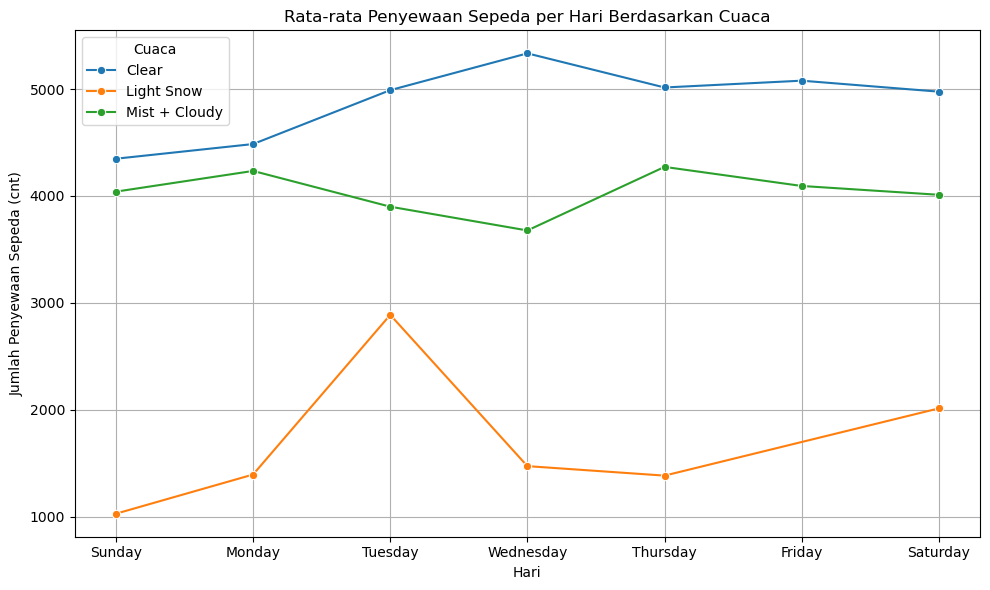

In [180]:
# Ubah pivot_table ke long format
pivot_long = pivot_table.reset_index().melt(id_vars='weekday', 
                                             var_name='weathersit', 
                                             value_name='average_count')

# Mengurutkan hari agar plot muncul dari Minggu sampai Sabtu secara berurutan
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
pivot_long['weekday'] = pd.Categorical(pivot_long['weekday'],
                                       categories=ordered_days,
                                       ordered=True)

# Visualisasi lineplot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_long, x='weekday', y='average_count', hue='weathersit', marker='o')

plt.title('Rata-rata Penyewaan Sepeda per Hari Berdasarkan Cuaca')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.legend(title='Cuaca')
plt.grid(True)
plt.tight_layout()
plt.show()

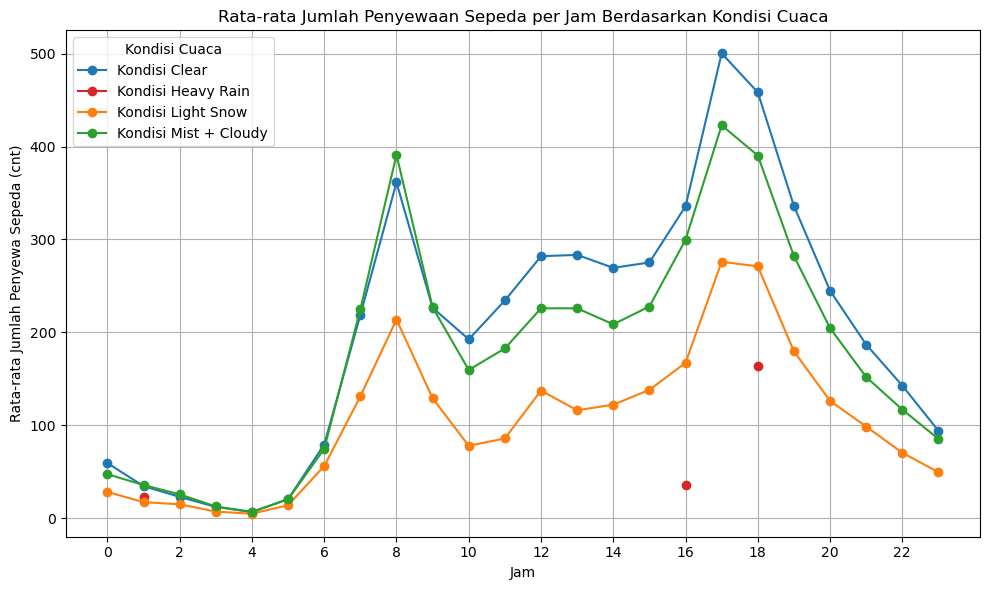

In [181]:
# Warna khusus untuk masing-masing kondisi cuaca
colors = {
    'Clear': '#1f77b4',         # Biru
    'Mist + Cloudy': '#2ca02c', # Hijau
    'Light Snow': '#ff7f0e',    # Oranye
    'Heavy Rain': '#d62728'     # Merah
}

# Membuat plot line untuk setiap kondisi cuaca per jam
plt.figure(figsize=(10, 6))  

# Melakukan iterasi untuk setiap kondisi cuaca
for column in weather_by_hour.columns:
    plt.plot(
        weather_by_hour.index,             
        weather_by_hour[column],           
        marker="o",                       
        linestyle="-",                     
        color=colors.get(column, None),    
        label=f'Kondisi {column}'          
    )

plt.title("Rata-rata Jumlah Penyewaan Sepeda per Jam Berdasarkan Kondisi Cuaca")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Penyewa Sepeda (cnt)")
plt.legend(title="Kondisi Cuaca")
plt.grid(True)
plt.xticks(ticks=range(0, 24, 2)) # Mengatur tampilan jam (x-axis) agar tampil tiap 2 jam
plt.tight_layout()
plt.show()


**Insight Pertanyaan 1:**
- Berdasarkan grafik 1, rata-rata penyewaan sepeda tertinggi secara konsisten terjadi saat kondisi cuaca cerah (Clear) dengan puncaknya di Hari Rabu sekitar 5400an penyewa. Diikuti kondisi cuaca Mist + Cloudy dengan rata-rata penyewaan sepeda yang cukup stabil di kisaran 4000-an meskipun sempat turun di bawah 4000 saat hari Rabu. Terakhir, kondisi Light Snow rata-rata penyewaan sepeda secara konsisten menurun tajam hanya sekitar 1000-2900 penyewa. Penurunan paling esktrem terjadi di Hari Minggu sekitar 1000-an.
    - Untuk menjaga kegiatan operasional saat cuaca buruk, mungkin dapat dilakukan pengoptimalan aplikasi dengan memperbarui informasi cuaca secara real-time dan memberikan rekomendasi rute sepeda yang lebih aman. Selanjutnya jika memungkinan, bisa mengadakan asuransi perlindungan cuaca buruk bagi pelanggan setia.
    - Pada saat cuaca cerah, ada baiknya meningkatkan jumlah sepeda untuk disewa agar kepuasan dan kesetiaan pelanggan terjaga.
    - Secara garis besar, grafik 1 memberikan gambaran umum tren penyewaan sepeda berdasarkan kondisi cuaca menggunakan tabel day_df
- Berdasarkan grafik 2, data hour_df menjelaskan bahwa di hari dengan kondisi cuaca cerah dan berkabut (Clear dan Mist + Cloudy) memiliki rata-rata lonjakan jumlah penyewaan sepeda yang tinggi di jam-jam tertentu seperti pada kisaran pukul 8 (pagi hari) dan pukul 17 (sore hari). Terjadinya lonjakan penyewaan sepeda pada kisaran kedua jam tersebut dimungkinkan karena adanya aktivitas berangkat ke kantor atau antar sekolah dan aktivitas pulang kerja atau sekadar rekreasi sore hari. Oleh karena itu, ketersediaan sepeda pada waktu-waktu tersebut dapat ditingkatkan sementara di luar waktu tersebut dapat digunakan sebagai jadwal perawatan atau redistribusi sepeda agar meningkatkan kepuasaan pengguna atau pelanggan

### Pertanyaan 2: Bagaimana perbedaan penyewaan sepeda pada weekend dibandingkan weekday?

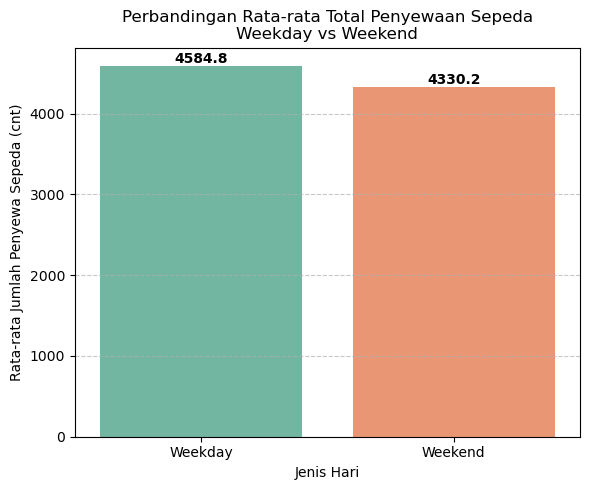

In [182]:
"""
Bar Plot untuk melihat perbedaan rata-rata jumlah penyewaan sepeda 
"""
# Hitung rata-rata penyewaan berdasarkan Weekend/Weekday
avg_rent_by_workingday = day_df.groupby('workingday')['cnt'].mean().reset_index()

# Buat barplot
plt.figure(figsize=(6, 5))
barplot = sns.barplot(
    data=avg_rent_by_workingday,
    x='workingday',
    y='cnt',
    hue='workingday',       
    palette='Set2',
    legend=False            
)

# Tambahkan nilai di atas setiap bar
for index, row in avg_rent_by_workingday.iterrows():
    barplot.text(
        x=index,
        y=row['cnt'] + 1,
        s=f"{row['cnt']:.1f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Perbandingan Rata-rata Total Penyewaan Sepeda\nWeekday vs Weekend')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda (cnt)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


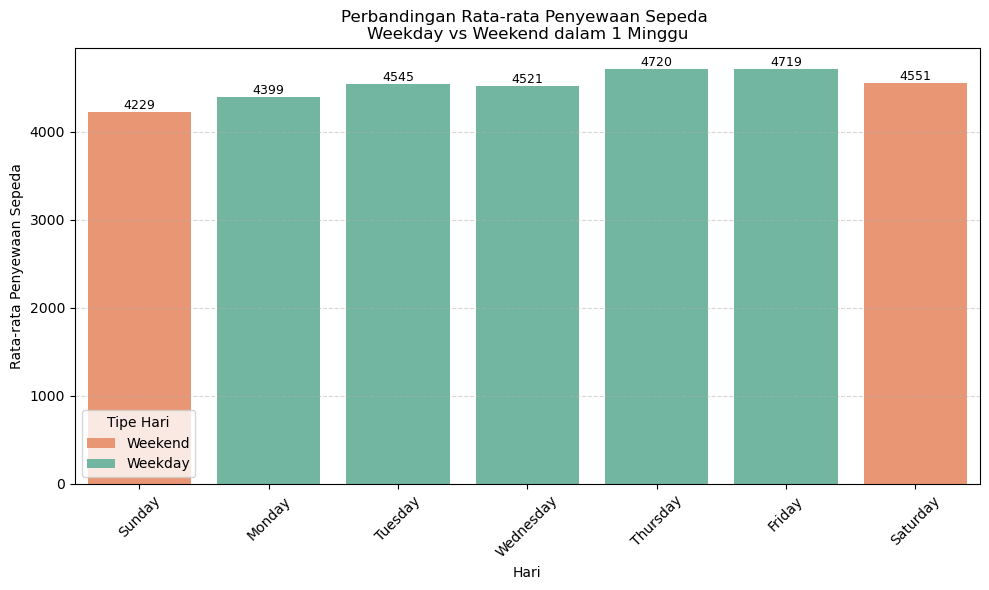

In [ ]:
# Atur urutan hari 
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_df['weekday'] = day_df['weekday'].astype(CategoricalDtype(categories=day_order, ordered=True))

# Filter hanya kombinasi hari dan tipe hari yang valid
valid_df = day_df[
    ((day_df['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (day_df['workingday'] == 'Weekday')) |
    ((day_df['weekday'].isin(['Saturday', 'Sunday'])) & (day_df['workingday'] == 'Weekend'))
]

# Hitung rata-rata penyewaan
avg_by_day_type = valid_df.groupby(['weekday', 'workingday'], observed=True)['cnt'].mean().reset_index()

# Set warna sesuai Set2
custom_palette = {'Weekend': '#fc8d62', 'Weekday': '#66c2a5'}

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=avg_by_day_type,
    x='weekday',
    y='cnt',
    hue='workingday',
    palette=custom_palette
)

# Tambahkan label di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.title("Perbandingan Rata-rata Penyewaan Sepeda \nWeekday vs Weekend dalam 1 Minggu")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.legend(title="Tipe Hari")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


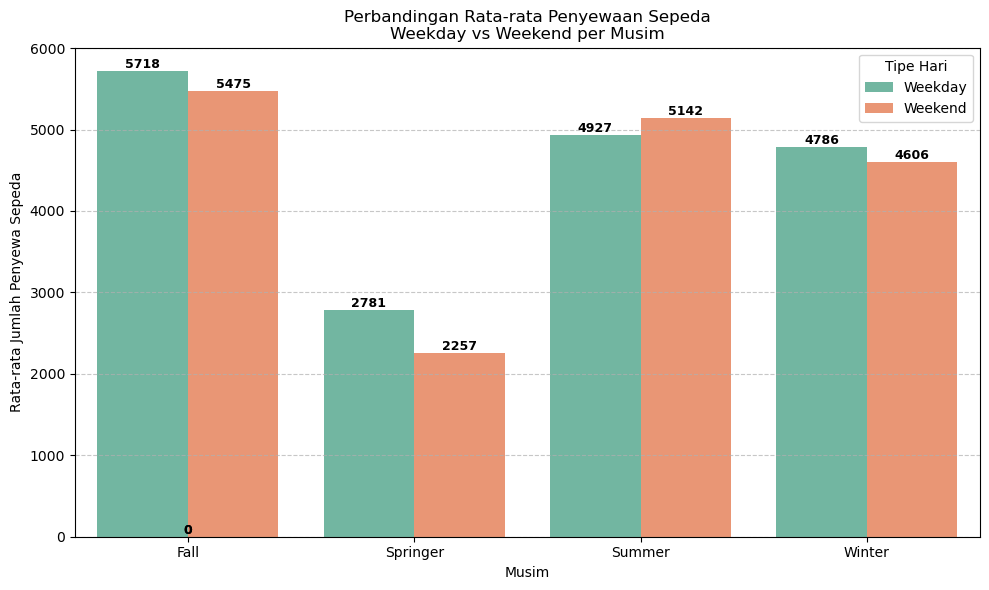

In [184]:
# Salin data agar tidak ubah dataframe asli
df = day_df.copy()

# Hitung rata-rata jumlah penyewa berdasarkan kombinasi season dan workingday
grouped = df.groupby(['season', 'workingday'], observed=True)['cnt'].mean().reset_index()

# Buat grouped barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=grouped,
    x='season',
    y='cnt',
    hue='workingday',  
    palette='Set2'
)

# Tambahkan label di atas setiap bar
for patch in barplot.patches:
    height = patch.get_height()
    barplot.annotate(
        f"{height:.0f}",
        (patch.get_x() + patch.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.title('Perbandingan Rata-rata Penyewaan Sepeda\nWeekday vs Weekend per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda')
plt.legend(title='Tipe Hari')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insights Pertanyaan 2:**
- Berdasarkan bar plot 1, secara umum, rata-rata total penyewaan sepeda pada hari kerja (weekday) sedikit lebih tinggi (4585 unit) dibandingkan dengan weekend (4330 unit)
- Barplot 2 menggambarkan distribusi penyewaan sepeda dalam 1 minggu dengan pengelompokan hari Senin sampai Jumat sebagai Weekday dan Sabtu-Minggu sebagai weekend. Hari Kamis (Weekday) mencatat rata-rata tertinggi penyewaan sepeda sebesar 4720 unit, selisih 1 unit dengan hari Jumat yakni 4719 unit. Hari terendah rata-rata penyewaan sepeda justru tercatat pada hari Minggu (Weekend) yakni 4229 unit. Hal ini kemungkinan disebabkan oleh lokasi penyewaan sepeda relatif lebih dekat ke kawasan perkantoran daripada tempat rekreasi. Bar plot 2 ini memperkuat bar plot 1 bahwa rata-rata penyewaan sepeda saat Weekday lebih tinggi secara konsisten dibandingkan Weekend. Fenomena ini menunjukkan bahwa sepeda lebih sering digunakan untuk komuter kerja, sekolah atau persiapan Weekend (khusus hari Jumat)
- Bar plot 3 memperlihatkan bagaimana pola penyewaan sepeda berubah antara weekday dan weekend di setiap musim. Fall menjadi rata-rata penyewaan sepeda tertinggi baik saat Weekday (5718 penyewa) maupun Weekend (5475 penyewa). Sedangkan Spring menjadi rata-rata penyewaan sepeda terendah baik saat Weekday (2781 penyewa) maupun Weekend (2257 penyewa).</br>
Pola umum yang terjadi adalah
    - Fall & Winter: Weekday lebih tinggi daripada Weekend
    - Summer: Weekend lebih tinggi dari Weekday
    - Spring: Keduanya rendah, tapi Weekday tetap dominan

## Conclusion

- Conclution pertanyaan 1: Kondisi cuaca memengaruhi rata-rata penyewaan sepeda pada waktu-waktu genting. Terdapat lonjakan penyewaan pada pagi hari (jam 6–9) dan sore hari (jam 16–19) saat cuaca cerah (Clear), yang mengindikasikan bahwa penyewa memanfaatkan waktu tersebut untuk perjalanan pulang-pergi ke kantor atau sekolah, serta rekreasi sore. Sebaliknya, pada kondisi cuaca buruk (Light Snow dan Heavy Rain), terutama saat Heavy Rain, tidak tampak adanya lonjakan, bahkan terjadi penurunan signifikan di jam-jam sibuk, yang menunjukkan bahwa cuaca tidak bersahabat secara langsung menghambat aktivitas penyewaan di waktu-waktu genting.
- Conclution pertanyaan 2: Bar plot 1 dan 2 menunjukkan sedikit perbedaan antara rata-rata penyewaan sepeda untuk weekday vs weekend dengan weekday lebih tinggi daripada weekend. Selanjutnya pola penyewaan sepeda antara weekday vs weekend diperkuat dengan korelasi setiap musim. Hasilnya Weekday tetap lebih dominan daripada weekend (Fall dan Winter lebih unggul daripada Spring). 

## Menerapkan Analisis Lanjutan (Opsional)

Bisa RFM analysis, geospatial analysis, clutering, dll

#### **RFM Analysis**

RFM analysis digunakan untuk memahami perilaku user berdasarkan 3 faktor utama:
- Recency: kapan terakhir kali user menyewa sepeda
- Frequency: seberapa sering user menyewa sepeda
- Monetary: total jumlah sepeda yang disewa

a) RFM Analysis untuk Pengguna Terdaftar

In [185]:
# copy dataframe asli tanpa modifikasi
hour_df_copy = hour_df.copy()

# hitung current_date dari data
current_date = max(hour_df_copy['dteday'])

# Groupby tanpa modifikasi data asli
rfm_df = (
    hour_df_copy
    .groupby('registered', as_index=False)  # Group by user ID
    .agg(
        Recency=('dteday', lambda x: (current_date - x.max()).days),
        Frequency=('instant', 'count'),  # Asumsi setiap baris = 1 transaksi
        Monetary=('cnt', 'sum')          # Total peminjaman
    )
)

print("RFM Analysis untuk Registered Users (Pelanggan terdaftar):")
rfm_df.head()

RFM Analysis untuk Registered Users (Pelanggan terdaftar):


,registered,Recency,Frequency,Monetary
0,0,38,24,35
1,1,0,201,294
2,2,1,245,648
3,3,0,294,1154
4,4,3,307,1602


**Insights:**
- Registered user ID 0 terakhir kali aktif menyewa sepeda 38 hari yang lalu dengan frekuensi penyewaan sepeda sebanyak 24 kali dan total jumlah sepeda yang disewa adalah 35 sepeda. Sedangkan registered user ID 1-4 terakhir kali aktif menyewa sepeda di kisaran 1-3 hari yang lalu dengan frekuensi penyewaan sepeda lebih dari 200 kali dan total jumlah sepeda yang disewa pun bervariasi
- Perbedaan mencolok terlihat pada nilai Monetary ID 4 menyumbang kontribusi tertinggi (1.602 sewa), hampir 46 kali lipat dibandingkan ID 0 (35 sewa). Hal ini menunjukkan segmentasi yang ekstrem —beberapa pelanggan berkontribusi besar, sementara lainnya minim. Berdasarkan peristiwa ini strategi bisnis dapat direkomendasikan seperti memberikan reward (diskon atau prioritas stok sepeda) untuk ID 1-4 guna mempertahankan loyalitas dan program re-engagement (email/promo) untuk ID 0

b) RFM Analysis berdasarkan waktu (per Jam)

In [186]:
rfm_by_hour = (hour_df_copy.groupby('hr', as_index=False).agg(
        Recency=('dteday', lambda x: (current_date - x.max()).days),
        Frequency=('instant', 'count'),  # Aktivitas per jam
        Monetary=('cnt', 'sum')          # Total peminjaman per jam
    )
    .sort_values('Monetary', ascending=False)
)

print("\nRFM Analysis per Jam:")
rfm_by_hour.head()


RFM Analysis per Jam:


,hr,Recency,Frequency,Monetary
17,17,0,730,336860
18,18,0,728,309772
8,8,0,727,261001
16,16,0,730,227748
19,19,0,728,226789


**Insight:**
- Pola penggunaan sepeda sewa sangat terkonsentrasi pada jam-jam sibuk, khususnya jam 17.00-19.00 dan jam 08.00. Nilai Monetary (total jumlah sepeda yang disewa) tertinggi terjadi pada jam 17 dengan 336.860 sewa, diikuti jam 18 (309.772 sewa) dan jam 8 (261.001 sewa). Hal ini menunjukkan bahwa jam pulang kerja (17.00-19.00) menjadi puncak aktivitas penyewaan sepeda, melebihi jam berangkat kerja (08.00). Recency 0 pada semua jam menandakan bahwa jam-jam ini sepeda sewa tetap aktif digunakan hingga data terbaru, sementara Frequency yang tinggi (727-730 kali sepeda disewa) mengindikasikan konsistensi pola penggunaan dari waktu ke waktu

c) RFM Analysis dengan Skor

In [187]:
# Buat copy hasil RFM
rfm_scored = rfm_df.copy()

# Hitung skor (1-5) tanpa modifikasi data asli
rfm_scored['R_Score'] = pd.qcut(rfm_scored['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm_scored['F_Score'] = pd.qcut(rfm_scored['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
rfm_scored['M_Score'] = pd.qcut(rfm_scored['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

# Gabungkan skor
rfm_scored['RFM_Score'] = (
    rfm_scored['R_Score'].astype(str) + 
    rfm_scored['F_Score'].astype(str) + 
    rfm_scored['M_Score'].astype(str)
)

print("\nRFM dengan Skor:")
rfm_scored.head()


RFM dengan Skor:


,registered,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,0,38,24,35,3,4,1,341
1,1,0,201,294,5,5,1,551
2,2,1,245,648,5,5,1,551
3,3,0,294,1154,5,5,1,551
4,4,3,307,1602,5,5,2,552


**Insights:**
- Registered users ID 1-4 menunjukkan profil yang sangat aktif dengan R_Score 5 (Recency terbaik, baru saja menyewa), F_Score 5 (Frequency tinggi, sering menyewa), dan M_Score 1-2 (Monetary rendah-menengah). Skor RFM mereka (551-552) menempatkan mereka dalam kategori "Top Users", terutama ID 4 dengan Monetary tertinggi (1.602 sewa). Namun, menarik bahwa meskipun Frequency tinggi, M_Score relatif rendah (1-2), yang mengindikasikan bahwa kontribusi nilai mereka per transaksi mungkin terbatas —misalnya, menyewa dalam durasi pendek atau sepeda berkapasitas kecil
- ID 0 dengan skor 341 termasuk dalam kategori "Berisiko atau Butuh Perhatian Lebih". Recency 38 hari (R_Score 3) dan Monetary rendah (M_Score 1) menunjukkan pengguna yang sudah lama tidak aktif dan minim kontribusi. Perbedaan kontras antara ID 0 dan ID 1-4 menyoroti 2 kelompok registered users yang ekstrem: sebagian kecil sangat aktif, sementara lainnya hampir tidak terlibat

In [189]:
# Menyimpan dataset secara terpisah
day_df.to_csv("day_data.csv", index=False)
hour_df.to_csv("hour_data.csv", index=False)